In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib notebook

df1 = pd.read_csv('loan_application.csv')
df2 = pd.read_csv('total_loans.csv')
df2 = df2[['month', 'total_loans']]

times = pd.DatetimeIndex(df2['month'])
loans, applications, year = [], [], []

for i in df2.groupby(by = times.year):
    loans.append(np.sum(i[1]['total_loans']) / 1000)
    
for i in df1.groupby(by = 'financial_year'):
    year.append(i[0])
    applications.append(np.sum(i[1]['no_of_applications']))

Text(0.5, 1.0, 'Loan Applications VS Loan Amount (2006-15)')

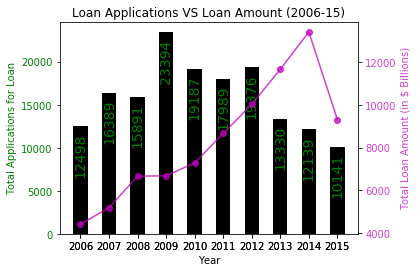

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
bars = plt.bar(year, applications, align='center', linewidth=0, width = 0.5, color='black')
plt.xticks(year)
plt.xlabel('Year')
plt.yticks(color = 'green')
plt.ylabel('Total Applications for Loan', color = 'green')

for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2000, str(int(height)) , ha='center', 
                   color='green', fontsize=14, rotation = 'vertical')

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot(year, loans[2:], '-o', color = 'm', alpha = 0.75)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.yticks(color = 'm', alpha = 0.75)
plt.ylabel("Total Loan Amount (in $ Billions)", color = 'm', alpha = 0.75)
plt.tight_layout()
plt.title('Loan Applications VS Loan Amount (2006-15)')